## Results plots for in paper

In [1]:
import numpy as np
import xarray as xr
import pickle

import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.gridspec as gridspec
import cmocean as cmo
import cmcrameri as cmc
import seaborn as sns
sns.set_style("white")

## Load data

In [2]:
# Hydrographic sections

# on a (lat, depth) grid
ds_section_depth = xr.open_dataset('data/variables_from_section-lat_depth.nc')
depth_section = ds_section_depth.depth
lat_section = ds_section_depth.lat

# on a (dist, gamma^n) grid
ds_section_gamma = xr.open_dataset('data/variables_from_section-dist_gamma.nc')
gamma_section = ds_section_gamma.gamma
dist_section = ds_section_gamma.dist

# full section
ds_section_depth_full = xr.open_dataset('data/variables_from_section-lat_depth-full.nc')
depth_section_full = ds_section_depth_full.depth
lat_section_full = ds_section_depth_full.lat

In [3]:
# Moorings

# on a (lat, depth) grid
ds_moorings_sr1b_depth = xr.open_dataset(f'data/variables_from_moorings_SR1b-lat_depth.nc')
ds_moorings_cmems_depth = xr.open_dataset(f'data/variables_from_moorings_CMEMS-lat_depth.nc')
ds_moorings_sose_depth = xr.open_dataset(f'data/variables_from_moorings_SOSE-lat_depth.nc')
ds_moorings_argo_depth = xr.open_dataset(f'data/variables_from_moorings_Argo-lat_depth.nc')

depth_moorings = ds_moorings_sr1b_depth.depth
lat_moorings = ds_moorings_sr1b_depth.lat

# on a (dist, gamma^n) grid
ds_moorings_sr1b_gamma = xr.open_dataset(f'data/variables_from_moorings_SR1b-dist_gamma.nc')
ds_moorings_cmems_gamma = xr.open_dataset(f'data/variables_from_moorings_CMEMS-dist_gamma.nc')
ds_moorings_sose_gamma = xr.open_dataset(f'data/variables_from_moorings_SOSE-dist_gamma.nc')
ds_moorings_argo_gamma = xr.open_dataset(f'data/variables_from_moorings_Argo-dist_gamma.nc')

gamma_moorings = ds_moorings_sr1b_gamma.gamma
dist_moorings = ds_moorings_sr1b_gamma.dist

In [4]:
phi_PF = 0.55 * 9.8
phi_SAF = 0.7 * 9.8

pp_dist_func_SR1b = pickle.load(open('data/SR1b_section/pp_dist_sr1b.pkl', 'rb'))
pp_dist_func_CMEMS = pickle.load(open('data/CMEMS_reanalysis/pp_dist_cmems.pkl', 'rb'))
pp_dist_func_SOSE = pickle.load(open('data/SOSE_reanalysis/pp_dist_sose.pkl', 'rb'))
pp_dist_func_Argo = pickle.load(open('data/Argo_data/pp_dist_argo.pkl', 'rb'))

PF_dist_SR1b = pp_dist_func_SR1b(phi_PF)
SAF_dist_SR1b = pp_dist_func_SR1b(phi_SAF)
PF_dist_CMEMS = pp_dist_func_CMEMS(phi_PF)
SAF_dist_CMEMS = pp_dist_func_CMEMS(phi_SAF)
PF_dist_SOSE = pp_dist_func_SOSE(phi_PF)
SAF_dist_SOSE = pp_dist_func_SOSE(phi_SAF)
PF_dist_Argo = pp_dist_func_Argo(phi_PF)
SAF_dist_Argo = pp_dist_func_Argo(phi_SAF)

pp_dist_lat = pickle.load(open('data/pp_dist_lat.pkl', 'rb'))

PF_lat_SR1b = pp_dist_lat(PF_dist_SR1b)
SAF_lat_SR1b = pp_dist_lat(SAF_dist_SR1b)
PF_lat_CMEMS = pp_dist_lat(PF_dist_CMEMS)
SAF_lat_CMEMS = pp_dist_lat(SAF_dist_CMEMS)
PF_lat_SOSE = pp_dist_lat(PF_dist_SOSE)
SAF_lat_SOSE = pp_dist_lat(SAF_dist_SOSE)
PF_lat_Argo = pp_dist_lat(PF_dist_Argo)
SAF_lat_Argo = pp_dist_lat(SAF_dist_Argo)

## Mean $\Theta$ & $S_A$

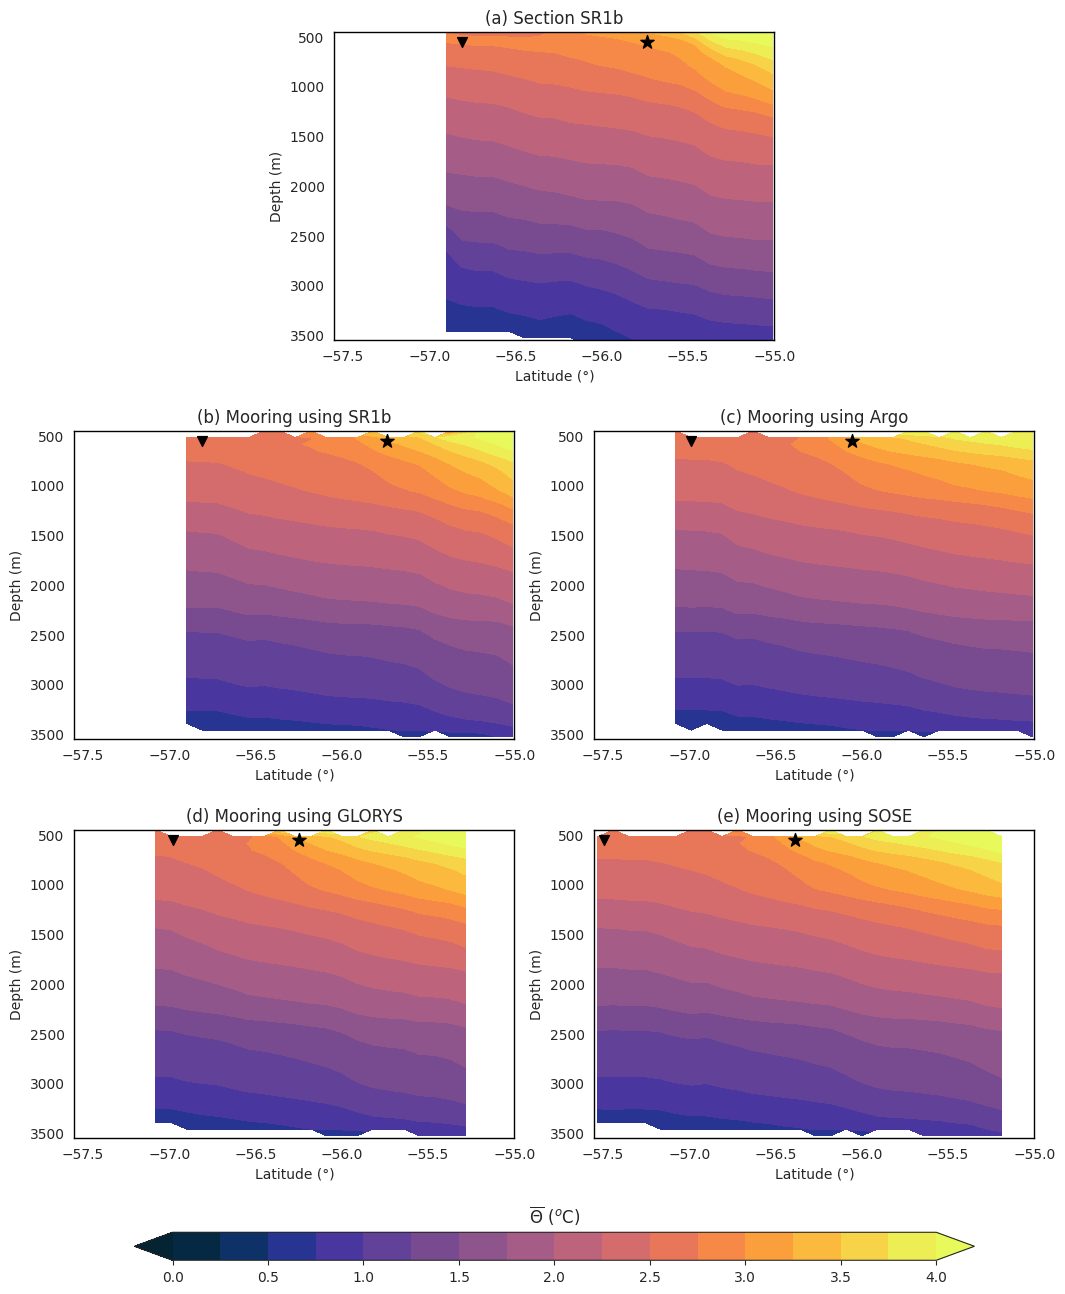

In [5]:
# Parameters (all in figure fraction coordinates: 0..1)
panel_size = 0.22   # width & height of each panel (fraction of figure)
gap = 0.065         # vertical gap between top panel and 2x2 grid
wspace = 0.04       # horizontal gap between grid panels
hspace = 0.065      # vertical gap between grid panels
center_x = 0.5      # horizontal center for the layout
grid_center_y = 0.45  # vertical center of the 2x2 grid

fig = plt.figure(figsize=(20,14))

s = panel_size
# The total width/height of the 2×2 block including internal gaps
grid_width  = 2*s + wspace
grid_height = 2*s + hspace

# bottom-left corner of the 2×2 block
grid_left = center_x - grid_width/2
grid_bottom = grid_center_y - grid_height/2

# Compute panel positions with spacing
# We'll name them as:
# 2 3
# 4 5
pos = {}
pos[2] = [grid_left,            grid_bottom + s + hspace, s, s]  # top-left
pos[3] = [grid_left + s + wspace, grid_bottom + s + hspace, s, s]  # top-right
pos[4] = [grid_left,            grid_bottom,               s, s]  # bottom-left
pos[5] = [grid_left + s + wspace, grid_bottom,             s, s]  # bottom-right

# Panel 1 centered above the middle of the 2x2 block, same size s
panel1_bottom = grid_bottom + grid_height + gap
pos[1] = [center_x - s/2, panel1_bottom, s, s]

# Create axes
axes = {}
for i in range(1,6):
    left, bottom, w, h = pos[i]
    axes[i] = fig.add_axes([left, bottom, w, h])
    for spine in axes[i].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.0)

cmap = cmo.cm.thermal
levels = np.arange(0, 4.1, 0.25)

# SR1b
im1 = axes[1].contourf(lat_section, depth_section, ds_section_depth.thetabar, cmap=cmap, levels = levels,extend='both')
axes[1].scatter(PF_lat_SR1b, 550, marker='v', color='k', s=50, zorder=10)
axes[1].scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
# Moorings SR1b
im2 = axes[2].contourf(lat_moorings, depth_moorings, ds_moorings_sr1b_depth.thetabar, cmap=cmap, levels = levels,extend='both')
axes[2].scatter(PF_lat_SR1b, 550, marker='v', color='k', s=50, zorder=10)
axes[2].scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
# Moorings Argo
im3 = axes[3].contourf(lat_moorings, depth_moorings, ds_moorings_argo_depth.thetabar, cmap=cmap, levels = levels,extend='both')
axes[3].scatter(PF_lat_Argo, 550, marker='v', color='k', s=50, zorder=10)
axes[3].scatter(SAF_lat_Argo, 550, marker='*', color='k', s=100, zorder=10)
# Moorings GLORYS
im4 = axes[4].contourf(lat_moorings, depth_moorings, ds_moorings_cmems_depth.thetabar, cmap=cmap, levels = levels,extend='both')
axes[4].scatter(PF_lat_CMEMS, 550, marker='v', color='k', s=50, zorder=10)
axes[4].scatter(SAF_lat_CMEMS, 550, marker='*', color='k', s=100, zorder=10)
# Moorings SOSE
im5 = axes[5].contourf(lat_moorings, depth_moorings, ds_moorings_sose_depth.thetabar, cmap=cmap, levels = levels,extend='both')
axes[5].scatter(PF_lat_SOSE, 550, marker='v', color='k', s=50, zorder=10)
axes[5].scatter(SAF_lat_SOSE, 550, marker='*', color='k', s=100, zorder=10)
 
for i in range(1,6):
    axes[i].set_xlim((-57.55, -55))
    axes[i].set_ylim(450,3550)
    axes[i].invert_yaxis()
    axes[i].set_xlabel('Latitude (°)')
    axes[i].set_ylabel('Depth (m)')
    

cbar_ax = fig.add_axes([0.29, 0.11, 0.42, 0.02])
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal')
cbar.ax.set_title(r'${\overline{\Theta}}$ ($^o$C)')

axes[1].set_title('(a) Section SR1b')
axes[2].set_title('(b) Mooring using SR1b')
axes[3].set_title('(c) Mooring using Argo')
axes[4].set_title('(d) Mooring using GLORYS')
axes[5].set_title('(e) Mooring using SOSE')

plt.savefig('figures_paper/thetabar.pdf', bbox_inches='tight')
plt.show()

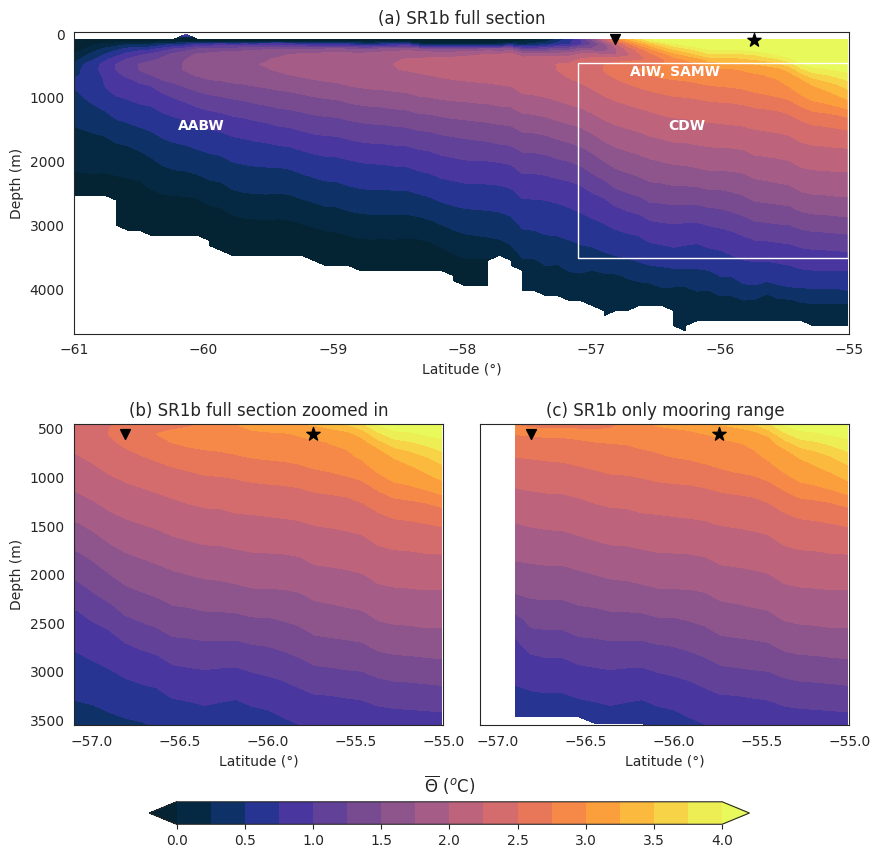

In [6]:
cmap = cmo.cm.thermal
levels = np.arange(0, 4.1, 0.25)
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.1, hspace=0.3)
fig = plt.figure(figsize=(10,9))

ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[1, 1])

im1 = ax1.contourf(lat_section_full, depth_section_full, ds_section_depth_full.thetabar, cmap=cmap, levels=levels, extend='both')
im2 = ax2.contourf(lat_section_full, depth_section_full, ds_section_depth_full.thetabar, cmap=cmap, levels=levels, extend='both')
im3 = ax3.contourf(lat_moorings, depth_section, ds_section_depth.thetabar, cmap=cmap, levels = levels,extend='both')

xlim_sub = (-57.1, -55)
rect = patches.Rectangle((xlim_sub[0], 450), xlim_sub[1]-xlim_sub[0]-0.01, 3510-450,
                              linewidth=1, edgecolor='w', facecolor='none')
ax1.add_patch(rect)
ax1.set_xlim(-61, -55)
ax1.set_ylim(-30,4700)
ax1.text(-60.2,1500,'AABW',color='white',fontweight='bold')
ax1.text(-56.7,650,'AIW, SAMW',color='white',fontweight='bold')
ax1.text(-56.4,1500,'CDW',color='white',fontweight='bold')
ax1.scatter(PF_lat_SR1b, 70, marker='v', color='k', s=50, zorder=10)
ax1.scatter(SAF_lat_SR1b, 90, marker='*', color='k', s=100, zorder=10)

for ax in [ax2,ax3]:
    ax.set_xlim(xlim_sub)
    ax.set_xticks([-57,-56.5,-56,-55.5,-55])
    ax.set_ylim(450,3550)
    ax.scatter(PF_lat_SR1b, 550, marker='v', color='k', s=50, zorder=10)
    ax.scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
for ax in [ax1,ax2]:
    ax.set_ylabel('Depth (m)')
for ax in [ax1,ax2,ax3]:
    ax.invert_yaxis()
    ax.set_xlabel('Latitude (°)')   
ax3.set_yticks([])

ax1.set_title('(a) SR1b full section')
ax2.set_title('(b) SR1b full section zoomed in')
ax3.set_title('(c) SR1b only mooring range')

cbar_ax = fig.add_axes([0.2, 0, 0.6, 0.025])
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal')
cbar.ax.set_title(r'${\overline{\Theta}}$ ($^o$C)')

plt.savefig('figures_paper/thetabar_full.pdf', bbox_inches='tight')
plt.show()

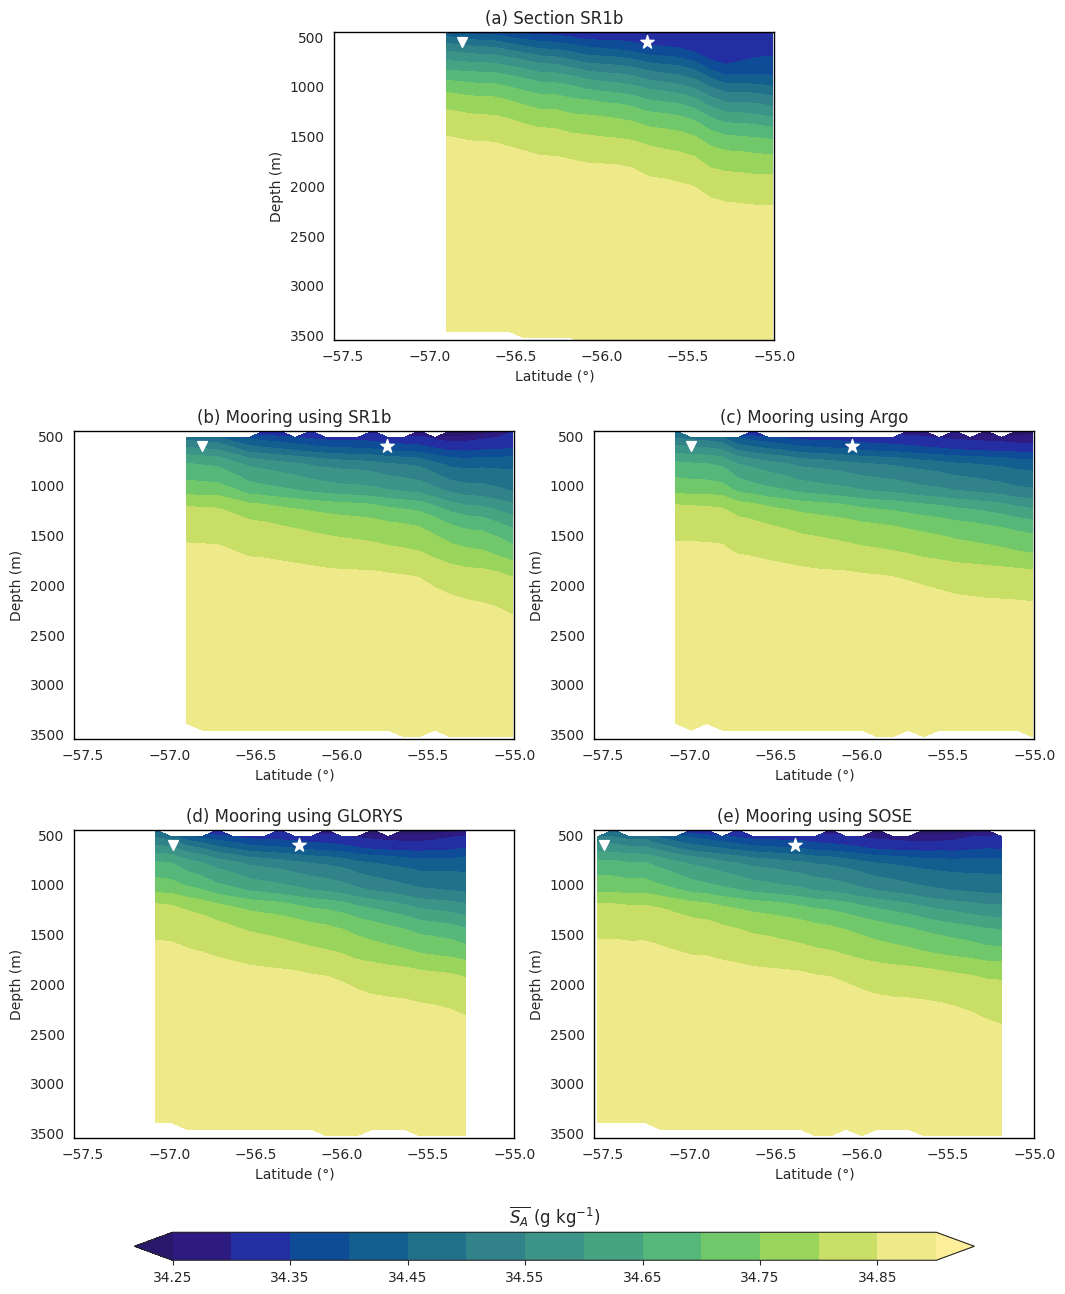

In [8]:
# Parameters (all in figure fraction coordinates: 0..1)
panel_size = 0.22   # width & height of each panel (fraction of figure)
gap = 0.065         # vertical gap between top panel and 2x2 grid
wspace = 0.04       # horizontal gap between grid panels
hspace = 0.065      # vertical gap between grid panels
center_x = 0.5      # horizontal center for the layout
grid_center_y = 0.45  # vertical center of the 2x2 grid

fig = plt.figure(figsize=(20,14))

s = panel_size
# The total width/height of the 2×2 block including internal gaps
grid_width  = 2*s + wspace
grid_height = 2*s + hspace

# bottom-left corner of the 2×2 block
grid_left = center_x - grid_width/2
grid_bottom = grid_center_y - grid_height/2

# Compute panel positions with spacing
# We'll name them as:
# 2 3
# 4 5
pos = {}
pos[2] = [grid_left,            grid_bottom + s + hspace, s, s]  # top-left
pos[3] = [grid_left + s + wspace, grid_bottom + s + hspace, s, s]  # top-right
pos[4] = [grid_left,            grid_bottom,               s, s]  # bottom-left
pos[5] = [grid_left + s + wspace, grid_bottom,             s, s]  # bottom-right

# Panel 1 centered above the middle of the 2x2 block, same size s
panel1_bottom = grid_bottom + grid_height + gap
pos[1] = [center_x - s/2, panel1_bottom, s, s]

# Create axes
axes = {}
for i in range(1,6):
    left, bottom, w, h = pos[i]
    axes[i] = fig.add_axes([left, bottom, w, h])
    for spine in axes[i].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.0)

cmap = cmo.cm.haline
levels = np.arange(34.25, 34.91, 0.05)

# SR1b
im1 = axes[1].contourf(lat_section, depth_section, ds_section_depth.SAbar, cmap=cmap, levels = levels,extend='both')
axes[1].scatter(PF_lat_SR1b, 550, marker='v', color='w', s=50, zorder=10)
axes[1].scatter(SAF_lat_SR1b, 550, marker='*', color='w', s=100, zorder=10)
# Moorings SR1b
im2 = axes[2].contourf(lat_moorings, depth_moorings, ds_moorings_sr1b_depth.SAbar, cmap=cmap, levels = levels,extend='both')
axes[2].scatter(PF_lat_SR1b, 600, marker='v', color='w', s=50, zorder=10)
axes[2].scatter(SAF_lat_SR1b, 600, marker='*', color='w', s=100, zorder=10)
# Moorings Argo
im3 = axes[3].contourf(lat_moorings, depth_moorings, ds_moorings_argo_depth.SAbar, cmap=cmap, levels = levels,extend='both')
axes[3].scatter(PF_lat_Argo, 600, marker='v', color='w', s=50, zorder=10)
axes[3].scatter(SAF_lat_Argo, 600, marker='*', color='w', s=100, zorder=10)
# Moorings GLORYS
im4 = axes[4].contourf(lat_moorings, depth_moorings, ds_moorings_cmems_depth.SAbar, cmap=cmap, levels = levels,extend='both')
axes[4].scatter(PF_lat_CMEMS, 600, marker='v', color='w', s=50, zorder=10)
axes[4].scatter(SAF_lat_CMEMS, 600, marker='*', color='w', s=100, zorder=10)
# Moorings SOSE
im5 = axes[5].contourf(lat_moorings, depth_moorings, ds_moorings_sose_depth.SAbar, cmap=cmap, levels = levels,extend='both')
axes[5].scatter(PF_lat_SOSE, 600, marker='v', color='w', s=50, zorder=10)
axes[5].scatter(SAF_lat_SOSE, 600, marker='*', color='w', s=100, zorder=10)
 
for i in range(1,6):
    axes[i].set_xlim((-57.55, -55))
    axes[i].set_ylim(450,3550)
    axes[i].invert_yaxis()
    axes[i].set_xlabel('Latitude (°)')
    axes[i].set_ylabel('Depth (m)')
    

cbar_ax = fig.add_axes([0.29, 0.11, 0.42, 0.02])
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal')
cbar.ax.set_title(r'${\overline{S_A}}$ (g kg$^{-1}$)')

axes[1].set_title('(a) Section SR1b')
axes[2].set_title('(b) Mooring using SR1b')
axes[3].set_title('(c) Mooring using Argo')
axes[4].set_title('(d) Mooring using GLORYS')
axes[5].set_title('(e) Mooring using SOSE')

plt.savefig('figures_paper/SAbar.pdf', bbox_inches='tight')
plt.show()

## RMS $\Theta$

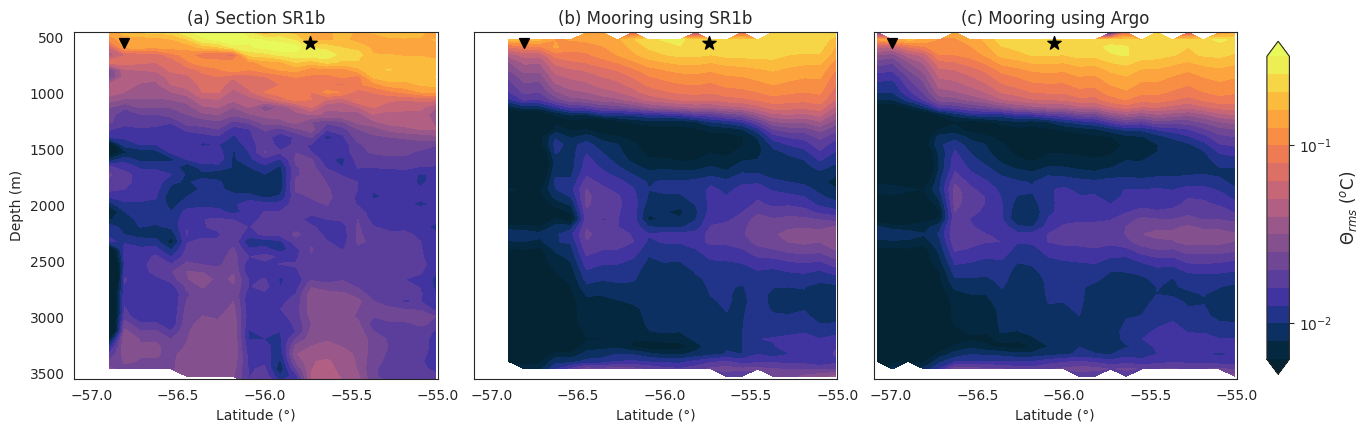

In [7]:
# Theta, for main text
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 4.5),sharex=True, sharey=True)
levels_theta = np.arange(-2.2, -0.4, 0.1)

# SR1b
im1 = ax1.contourf(lat_section, depth_section, np.log10(abs(ds_section_depth.rms_theta)), cmap=cmo.cm.thermal, levels = levels_theta,extend='both')
ax1.scatter(PF_lat_SR1b, 550, marker='v', color='k', s=50, zorder=10)
ax1.scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
# Moorings SR1b
im2 = ax2.contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_sr1b_depth.rms_theta)), cmap=cmo.cm.thermal, levels = levels_theta,extend='both')
ax2.scatter(PF_lat_SR1b, 550, marker='v', color='k', s=50, zorder=10)
ax2.scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
# Moorings Argo
im3 = ax3.contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_argo_depth.rms_theta)), cmap=cmo.cm.thermal, levels = levels_theta,extend='both')
ax3.scatter(PF_lat_Argo, 550, marker='v', color='k', s=50, zorder=10)
ax3.scatter(SAF_lat_Argo, 550, marker='*', color='k', s=100, zorder=10)

for ax in [ax1,ax2,ax3]:
    ax.set_xlim(-57.1,-55)
    ax.set_ylim(450,3550)
    ax.invert_yaxis()
    ax.set_xlabel('Latitude (°)')
ax1.set_ylabel('Depth (m)')

ax1.set_title(r'(a) Section SR1b')
ax2.set_title(r'(b) Mooring using SR1b')
ax3.set_title(r'(c) Mooring using Argo')

cbar_ax1 = fig.add_axes([0.92, 0.12, 0.015, 0.74])
cbar1 = fig.colorbar(im1, cax=cbar_ax1, orientation='vertical', ticks=[-2,-1])
cbar1.ax.set_yticklabels([r'$10^{-2}$',r'$10^{-1}$'])
cbar1.ax.set_ylabel(r'$\Theta_{rms}$ ($^o$C)',fontsize=12)

plt.subplots_adjust(wspace=0.1)

#plt.savefig('figures_paper/rms_theta.pdf', bbox_inches='tight')
plt.show()

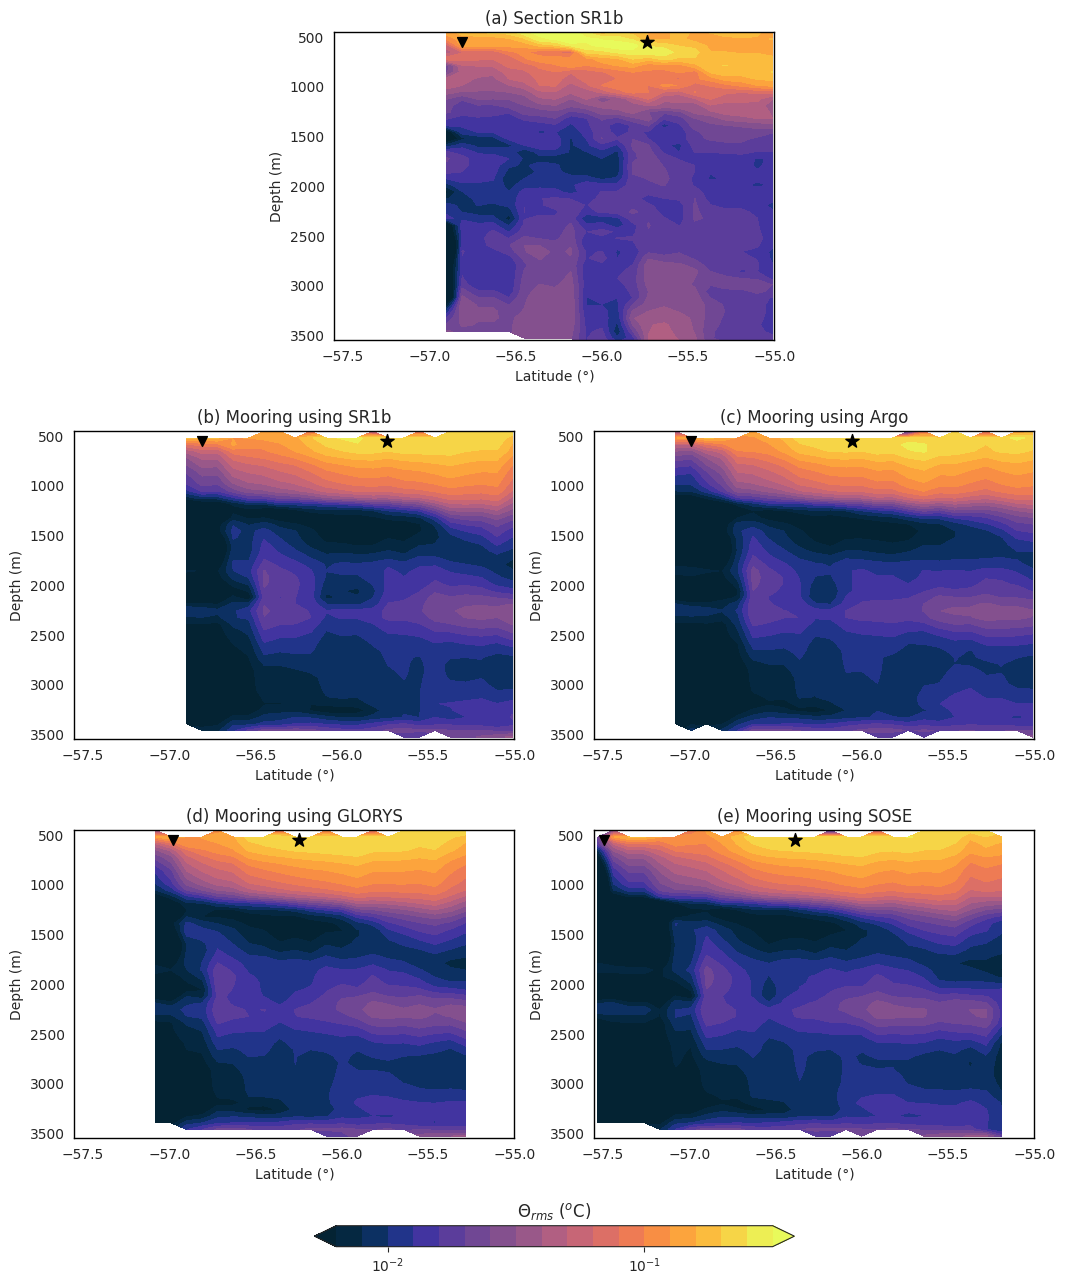

In [11]:
# Parameters (all in figure fraction coordinates: 0..1)
panel_size = 0.22   # width & height of each panel (fraction of figure)
gap = 0.065         # vertical gap between top panel and 2x2 grid
wspace = 0.04       # horizontal gap between grid panels
hspace = 0.065      # vertical gap between grid panels
center_x = 0.5      # horizontal center for the layout
grid_center_y = 0.45  # vertical center of the 2x2 grid

fig = plt.figure(figsize=(20,14))

s = panel_size
# The total width/height of the 2×2 block including internal gaps
grid_width  = 2*s + wspace
grid_height = 2*s + hspace

# bottom-left corner of the 2×2 block
grid_left = center_x - grid_width/2
grid_bottom = grid_center_y - grid_height/2

# Compute panel positions with spacing
# We'll name them as:
# 2 3
# 4 5
pos = {}
pos[2] = [grid_left,            grid_bottom + s + hspace, s, s]  # top-left
pos[3] = [grid_left + s + wspace, grid_bottom + s + hspace, s, s]  # top-right
pos[4] = [grid_left,            grid_bottom,               s, s]  # bottom-left
pos[5] = [grid_left + s + wspace, grid_bottom,             s, s]  # bottom-right

# Panel 1 centered above the middle of the 2x2 block, same size s
panel1_bottom = grid_bottom + grid_height + gap
pos[1] = [center_x - s/2, panel1_bottom, s, s]

# Create axes
axes = {}
for i in range(1,6):
    left, bottom, w, h = pos[i]
    axes[i] = fig.add_axes([left, bottom, w, h])
    for spine in axes[i].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.0)

cmap = cmo.cm.thermal
levels = np.arange(-2.2, -0.4, 0.1)

# SR1b
im1 = axes[1].contourf(lat_section, depth_section, np.log10(abs(ds_section_depth.rms_theta)), cmap=cmap, levels = levels,extend='both')
axes[1].scatter(PF_lat_SR1b, 550, marker='v', color='k', s=50, zorder=10)
axes[1].scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
# Moorings SR1b
im2 = axes[2].contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_sr1b_depth.rms_theta)), cmap=cmap, levels = levels,extend='both')
axes[2].scatter(PF_lat_SR1b, 550, marker='v', color='k', s=50, zorder=10)
axes[2].scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
# Moorings Argo
im3 = axes[3].contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_argo_depth.rms_theta)), cmap=cmap, levels = levels,extend='both')
axes[3].scatter(PF_lat_Argo, 550, marker='v', color='k', s=50, zorder=10)
axes[3].scatter(SAF_lat_Argo, 550, marker='*', color='k', s=100, zorder=10)
# Moorings GLORYS
im4 = axes[4].contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_cmems_depth.rms_theta)), cmap=cmap, levels = levels,extend='both')
axes[4].scatter(PF_lat_CMEMS, 550, marker='v', color='k', s=50, zorder=10)
axes[4].scatter(SAF_lat_CMEMS, 550, marker='*', color='k', s=100, zorder=10)
# Moorings SOSE
im5 = axes[5].contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_sose_depth.rms_theta)), cmap=cmap, levels = levels,extend='both')
axes[5].scatter(PF_lat_SOSE, 550, marker='v', color='k', s=50, zorder=10)
axes[5].scatter(SAF_lat_SOSE, 550, marker='*', color='k', s=100, zorder=10)
 
for i in range(1,6):
    axes[i].set_xlim((-57.55, -55))
    axes[i].set_ylim(450,3550)
    axes[i].invert_yaxis()
    axes[i].set_xlabel('Latitude (°)')
    axes[i].set_ylabel('Depth (m)')
    
cbar_ax = fig.add_axes([0.38, 0.12, 0.24, 0.015])
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal',ticks=[-2,-1])
cbar.ax.set_xticklabels([r'$10^{-2}$',r'$10^{-1}$'])
cbar.ax.set_title(r'$\Theta_{rms}$ ($^o$C)')

axes[1].set_title('(a) Section SR1b')
axes[2].set_title('(b) Mooring using SR1b')
axes[3].set_title('(c) Mooring using Argo')
axes[4].set_title('(d) Mooring using GLORYS')
axes[5].set_title('(e) Mooring using SOSE')

plt.savefig('figures_paper/rms_theta_all.pdf', bbox_inches='tight')
plt.show()

## Neutral gradient of $\Theta$

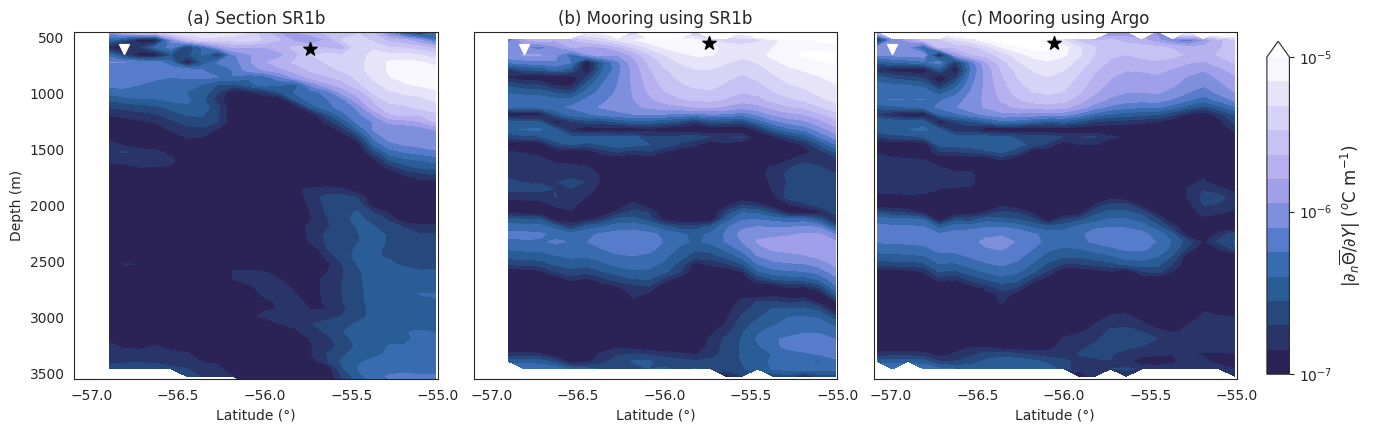

In [15]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 4.5),sharex=True, sharey=True)
levels_theta = np.arange(-7, -5, 0.15)
cm_theta = cmc.cm.devon

# SR1b
im1 = ax1.contourf(lat_section, depth_section, np.log10(abs(ds_section_depth.dthetabardy)), cmap=cm_theta, levels = levels_theta,extend='max')
ax1.scatter(PF_lat_SR1b, 600, marker='v', color='w', s=50, zorder=10)
ax1.scatter(SAF_lat_SR1b, 600, marker='*', color='k', s=100, zorder=10)
# Moorings SR1b
im2 = ax2.contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_sr1b_depth.dthetabardy)), cmap=cm_theta, levels = levels_theta,extend='max')
ax2.scatter(PF_lat_SR1b, 600, marker='v', color='w', s=50, zorder=10)
ax2.scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
# Moorings Argo
im3 = ax3.contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_argo_depth.dthetabardy)), cmap=cm_theta, levels = levels_theta,extend='max')
ax3.scatter(PF_lat_Argo, 600, marker='v', color='w', s=50, zorder=10)
ax3.scatter(SAF_lat_Argo, 550, marker='*', color='k', s=100, zorder=10)

for ax in [ax1,ax2,ax3]:
    ax.set_xlim(-57.1,-55)
    ax.set_ylim(450,3550)
    ax.invert_yaxis()
    ax.set_xlabel('Latitude (°)')
ax1.set_ylabel('Depth (m)')

ax1.set_title(r'(a) Section SR1b')
ax2.set_title(r'(b) Mooring using SR1b')
ax3.set_title(r'(c) Mooring using Argo')

cbar_ax1 = fig.add_axes([0.92, 0.12, 0.015, 0.74])
cbar1 = fig.colorbar(im1, cax=cbar_ax1, orientation='vertical', ticks=np.arange(-7, -4.5, 1))
cbar1.ax.set_yticklabels([r'$10^{-7}$',r'$10^{-6}$',r'$10^{-5}$'])
cbar1.ax.set_ylabel(r'$|\partial_n \overline{\Theta}/\partial Y|$ ($^o$C m$^{-1}$)',fontsize=12)

plt.subplots_adjust(wspace=0.1)

plt.savefig('figures_paper/gradients_theta.pdf', bbox_inches='tight')
plt.show()

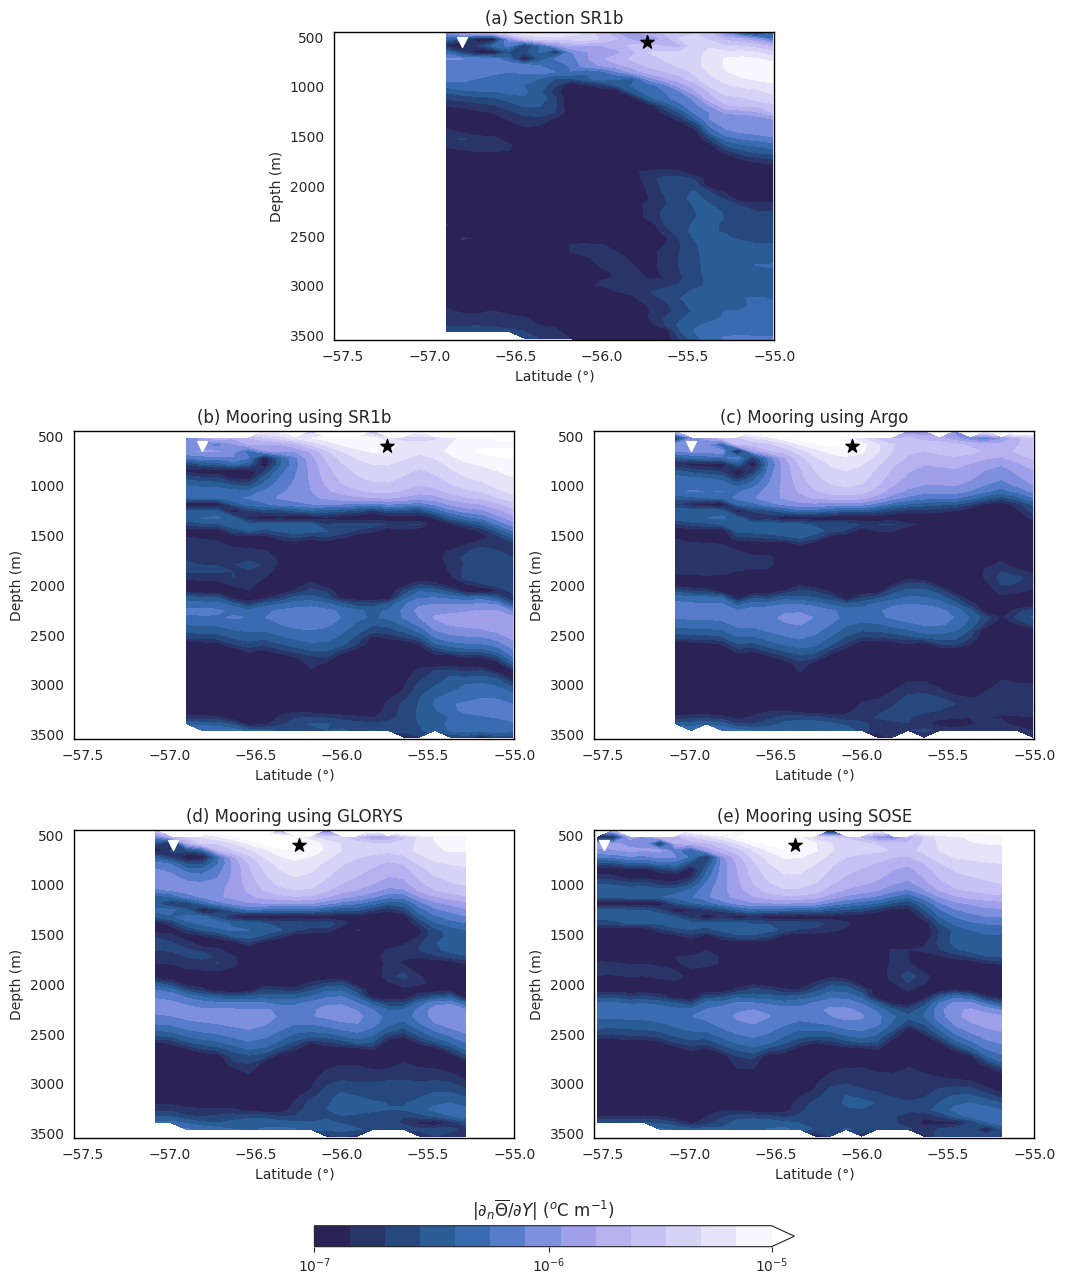

In [50]:
# Parameters (all in figure fraction coordinates: 0..1)
panel_size = 0.22   # width & height of each panel (fraction of figure)
gap = 0.065         # vertical gap between top panel and 2x2 grid
wspace = 0.04       # horizontal gap between grid panels
hspace = 0.065      # vertical gap between grid panels
center_x = 0.5      # horizontal center for the layout
grid_center_y = 0.45  # vertical center of the 2x2 grid

fig = plt.figure(figsize=(20,14))

s = panel_size
# The total width/height of the 2×2 block including internal gaps
grid_width  = 2*s + wspace
grid_height = 2*s + hspace

# bottom-left corner of the 2×2 block
grid_left = center_x - grid_width/2
grid_bottom = grid_center_y - grid_height/2

# Compute panel positions with spacing
# We'll name them as:
# 2 3
# 4 5
pos = {}
pos[2] = [grid_left,            grid_bottom + s + hspace, s, s]  # top-left
pos[3] = [grid_left + s + wspace, grid_bottom + s + hspace, s, s]  # top-right
pos[4] = [grid_left,            grid_bottom,               s, s]  # bottom-left
pos[5] = [grid_left + s + wspace, grid_bottom,             s, s]  # bottom-right

# Panel 1 centered above the middle of the 2x2 block, same size s
panel1_bottom = grid_bottom + grid_height + gap
pos[1] = [center_x - s/2, panel1_bottom, s, s]

# Create axes
axes = {}
for i in range(1,6):
    left, bottom, w, h = pos[i]
    axes[i] = fig.add_axes([left, bottom, w, h])
    for spine in axes[i].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.0)

cmap = cmc.cm.devon
levels = np.arange(-7, -5, 0.15)

# SR1b
im1 = axes[1].contourf(lat_section, depth_section, np.log10(abs(ds_section_depth.dthetabardy)), cmap=cmap, levels = levels,extend='max')
axes[1].scatter(PF_lat_SR1b, 550, marker='v', color='w', s=50, zorder=10)
axes[1].scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
# Moorings SR1b
im2 = axes[2].contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_sr1b_depth.dthetabardy)), cmap=cmap, levels = levels,extend='max')
axes[2].scatter(PF_lat_SR1b, 600, marker='v', color='w', s=50, zorder=10)
axes[2].scatter(SAF_lat_SR1b, 600, marker='*', color='k', s=100, zorder=10)
# Moorings Argo
im3 = axes[3].contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_argo_depth.dthetabardy)), cmap=cmap, levels = levels,extend='max')
axes[3].scatter(PF_lat_Argo, 600, marker='v', color='w', s=50, zorder=10)
axes[3].scatter(SAF_lat_Argo, 600, marker='*', color='k', s=100, zorder=10)
# Moorings GLORYS
im4 = axes[4].contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_cmems_depth.dthetabardy)), cmap=cmap, levels = levels,extend='max')
axes[4].scatter(PF_lat_CMEMS, 600, marker='v', color='w', s=50, zorder=10)
axes[4].scatter(SAF_lat_CMEMS, 600, marker='*', color='k', s=100, zorder=10)
# Moorings SOSE
im5 = axes[5].contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_sose_depth.dthetabardy)), cmap=cmap, levels = levels,extend='max')
axes[5].scatter(PF_lat_SOSE, 600, marker='v', color='w', s=50, zorder=10)
axes[5].scatter(SAF_lat_SOSE, 600, marker='*', color='k', s=100, zorder=10)
 
for i in range(1,6):
    axes[i].set_xlim((-57.55, -55))
    axes[i].set_ylim(450,3550)
    axes[i].invert_yaxis()
    axes[i].set_xlabel('Latitude (°)')
    axes[i].set_ylabel('Depth (m)')
    
cbar_ax = fig.add_axes([0.38, 0.12, 0.24, 0.015])
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal',ticks=np.arange(-7, -4.5, 1))
cbar.ax.set_xticklabels([r'$10^{-7}$',r'$10^{-6}$',r'$10^{-5}$'])
cbar.ax.set_title(r'$|\partial_n \overline{\Theta}/\partial Y|$ ($^o$C m$^{-1}$)',fontsize=12)

axes[1].set_title('(a) Section SR1b')
axes[2].set_title('(b) Mooring using SR1b')
axes[3].set_title('(c) Mooring using Argo')
axes[4].set_title('(d) Mooring using GLORYS')
axes[5].set_title('(e) Mooring using SOSE')

plt.savefig('figures_paper/gradients_theta_all.pdf', bbox_inches='tight')
plt.show()

## Mixing length

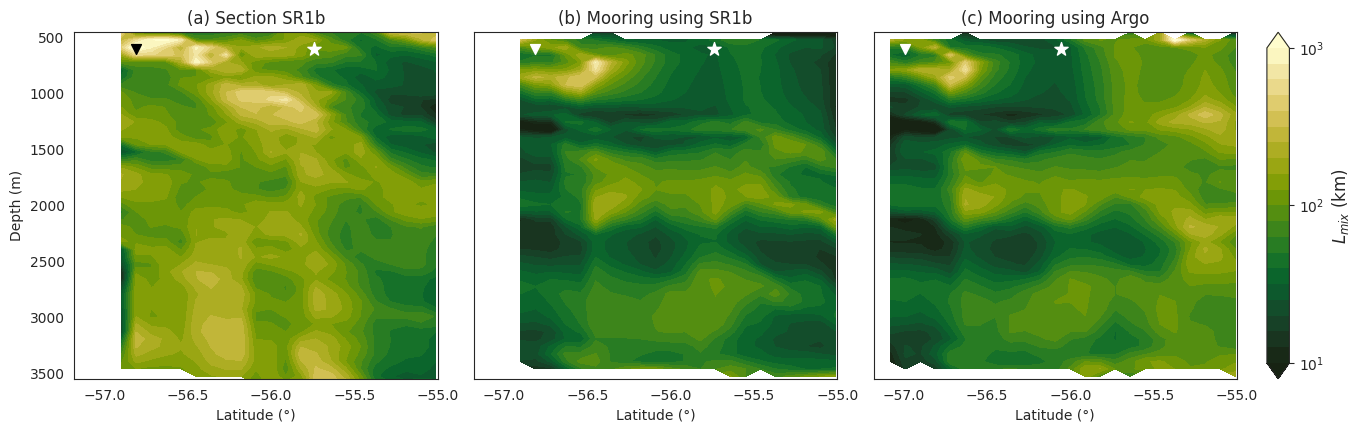

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 4.5), sharey=True)
levels = np.arange(4, 6.01, 0.1)
cmap = cmo.cm.speed_r

# SR1b
im1 = ax1.contourf(lat_section, depth_section, np.log10(abs(ds_section_depth.Lmix)), cmap=cmap, levels = levels,extend='both')
ax1.scatter(PF_lat_SR1b, 600, marker='v', color='k', s=50, zorder=10)
ax1.scatter(SAF_lat_SR1b, 600, marker='*', color='w', s=100, zorder=10)
# Moorings SR1b
im2 = ax2.contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_sr1b_depth.Lmix)), cmap=cmap, levels = levels,extend='both')
ax2.scatter(PF_lat_SR1b, 600, marker='v', color='w', s=50, zorder=10)
ax2.scatter(SAF_lat_SR1b, 600, marker='*', color='w', s=100, zorder=10)
# Moorings Argo
im3 = ax3.contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_argo_depth.Lmix)), cmap=cmap, levels = levels,extend='both')
ax3.scatter(PF_lat_Argo, 600, marker='v', color='w', s=50, zorder=10)
ax3.scatter(SAF_lat_Argo, 600, marker='*', color='w', s=100, zorder=10)

for ax in [ax1,ax2,ax3]:
    ax.set_xlim(-57.18,-55)
    ax.set_ylim(450,3550)
    ax.invert_yaxis()
    ax.set_xlabel('Latitude (°)')
ax1.set_ylabel('Depth (m)')

ax1.set_title(r'(a) Section SR1b')
ax2.set_title(r'(b) Mooring using SR1b')
ax3.set_title(r'(c) Mooring using Argo')

cbar_ax1 = fig.add_axes([0.92, 0.11, 0.015, 0.77])
cbar1 = fig.colorbar(im1, cax=cbar_ax1, orientation='vertical', ticks=[4,5,6])
cbar1.ax.set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$'])
cbar1.ax.set_ylabel(r'$L_{mix}$ (km)',fontsize=12)

plt.subplots_adjust(wspace=0.1)

plt.savefig('figures_paper/Lmix.pdf', bbox_inches='tight')
plt.show()

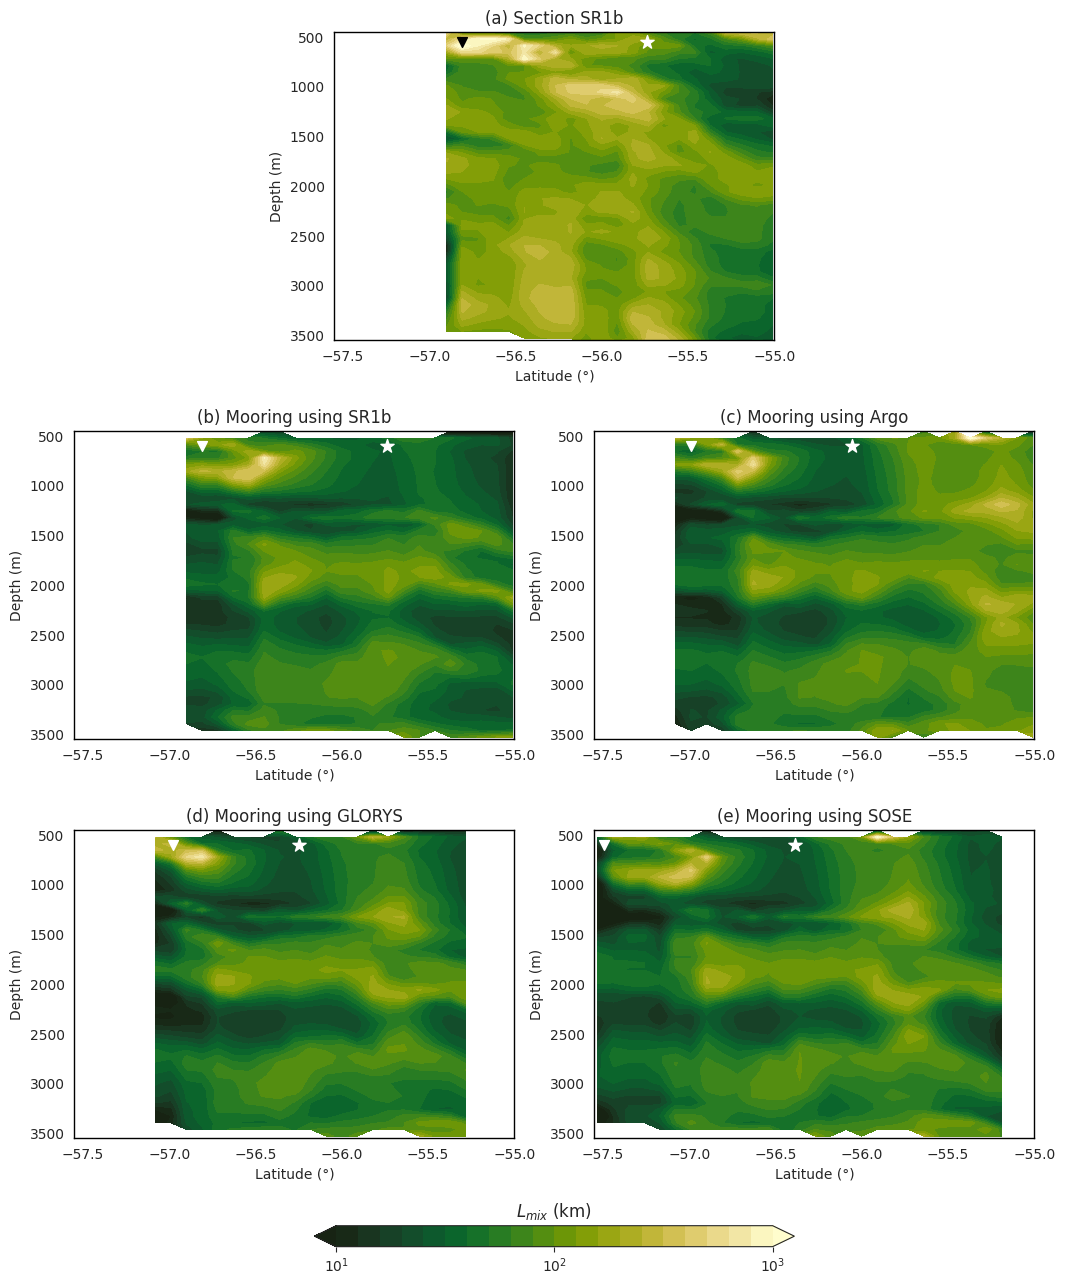

In [9]:
# Parameters (all in figure fraction coordinates: 0..1)
panel_size = 0.22   # width & height of each panel (fraction of figure)
gap = 0.065         # vertical gap between top panel and 2x2 grid
wspace = 0.04       # horizontal gap between grid panels
hspace = 0.065      # vertical gap between grid panels
center_x = 0.5      # horizontal center for the layout
grid_center_y = 0.45  # vertical center of the 2x2 grid

fig = plt.figure(figsize=(20,14))

s = panel_size
# The total width/height of the 2×2 block including internal gaps
grid_width  = 2*s + wspace
grid_height = 2*s + hspace

# bottom-left corner of the 2×2 block
grid_left = center_x - grid_width/2
grid_bottom = grid_center_y - grid_height/2

# Compute panel positions with spacing
# We'll name them as:
# 2 3
# 4 5
pos = {}
pos[2] = [grid_left,            grid_bottom + s + hspace, s, s]  # top-left
pos[3] = [grid_left + s + wspace, grid_bottom + s + hspace, s, s]  # top-right
pos[4] = [grid_left,            grid_bottom,               s, s]  # bottom-left
pos[5] = [grid_left + s + wspace, grid_bottom,             s, s]  # bottom-right

# Panel 1 centered above the middle of the 2x2 block, same size s
panel1_bottom = grid_bottom + grid_height + gap
pos[1] = [center_x - s/2, panel1_bottom, s, s]

# Create axes
axes = {}
for i in range(1,6):
    left, bottom, w, h = pos[i]
    axes[i] = fig.add_axes([left, bottom, w, h])
    for spine in axes[i].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.0)

cmap = cmo.cm.speed_r
levels = np.arange(4, 6.01, 0.1)

# SR1b
im1 = axes[1].contourf(lat_section, depth_section, np.log10(abs(ds_section_depth.Lmix)), cmap=cmap, levels = levels,extend='both')
axes[1].scatter(PF_lat_SR1b, 550, marker='v', color='k', s=50, zorder=10)
axes[1].scatter(SAF_lat_SR1b, 550, marker='*', color='w', s=100, zorder=10)
# Moorings SR1b
im2 = axes[2].contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_sr1b_depth.Lmix)), cmap=cmap, levels = levels,extend='both')
axes[2].scatter(PF_lat_SR1b, 600, marker='v', color='w', s=50, zorder=10)
axes[2].scatter(SAF_lat_SR1b, 600, marker='*', color='w', s=100, zorder=10)
# Moorings Argo
im3 = axes[3].contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_argo_depth.Lmix)), cmap=cmap, levels = levels,extend='both')
axes[3].scatter(PF_lat_Argo, 600, marker='v', color='w', s=50, zorder=10)
axes[3].scatter(SAF_lat_Argo, 600, marker='*', color='w', s=100, zorder=10)
# Moorings GLORYS
im4 = axes[4].contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_cmems_depth.Lmix)), cmap=cmap, levels = levels,extend='both')
axes[4].scatter(PF_lat_CMEMS, 600, marker='v', color='w', s=50, zorder=10)
axes[4].scatter(SAF_lat_CMEMS, 600, marker='*', color='w', s=100, zorder=10)
# Moorings SOSE
im5 = axes[5].contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_sose_depth.Lmix)), cmap=cmap, levels = levels,extend='both')
axes[5].scatter(PF_lat_SOSE, 600, marker='v', color='w', s=50, zorder=10)
axes[5].scatter(SAF_lat_SOSE, 600, marker='*', color='w', s=100, zorder=10)
 
for i in range(1,6):
    axes[i].set_xlim((-57.55, -55))
    axes[i].set_ylim(450,3550)
    axes[i].invert_yaxis()
    axes[i].set_xlabel('Latitude (°)')
    axes[i].set_ylabel('Depth (m)')
    
cbar_ax = fig.add_axes([0.38, 0.12, 0.24, 0.015])
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal',ticks=[4,5,6])
cbar.ax.set_xticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$'])
cbar.ax.set_title(r'$L_{mix}$ (km)',fontsize=12)

axes[1].set_title('(a) Section SR1b')
axes[2].set_title('(b) Mooring using SR1b')
axes[3].set_title('(c) Mooring using Argo')
axes[4].set_title('(d) Mooring using GLORYS')
axes[5].set_title('(e) Mooring using SOSE')

plt.savefig('figures_paper/Lmix_all.pdf', bbox_inches='tight')
plt.show()

## Merge $\Theta_\text{rms}$, $\partial \Theta / \partial Y$ and $L_\text{mix}$ into one figure

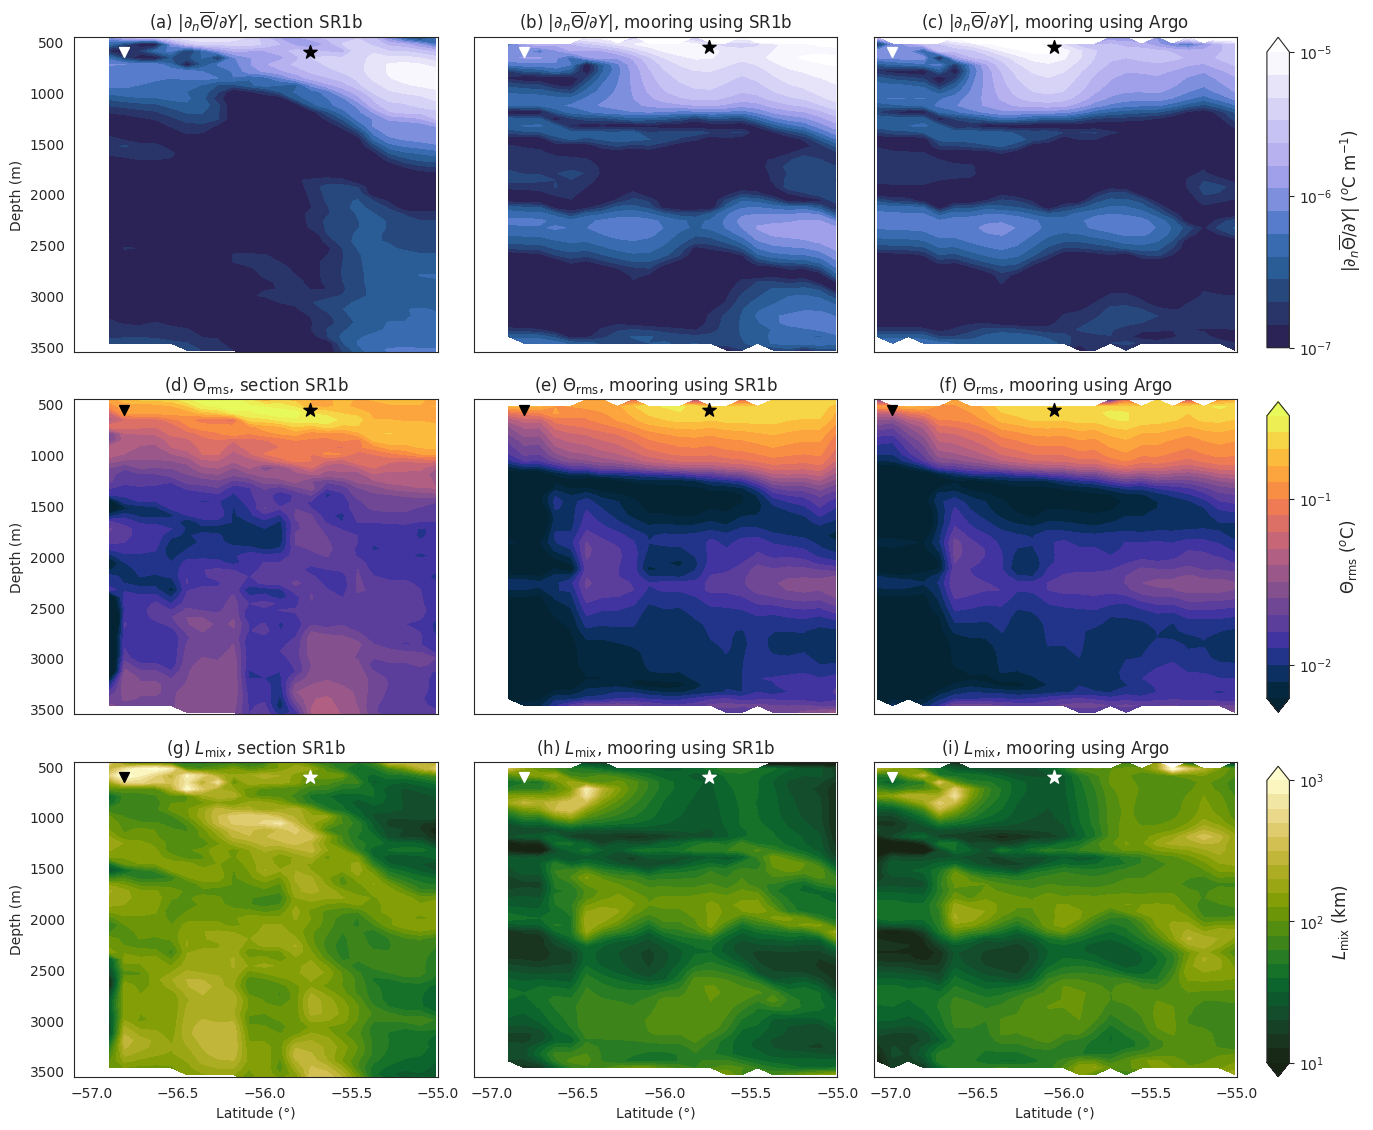

In [ ]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3, 3, figsize=(15, 13.5),sharex=True, sharey=True)

# NEUTRAL GRADIENT
levels_theta = np.arange(-7, -5, 0.15)
cm_theta = cmc.cm.devon

# SR1b
im1 = ax1.contourf(lat_section, depth_section, np.log10(abs(ds_section_depth.dthetabardy)), cmap=cm_theta, levels = levels_theta,extend='max')
ax1.scatter(PF_lat_SR1b, 600, marker='v', color='w', s=50, zorder=10)
ax1.scatter(SAF_lat_SR1b, 600, marker='*', color='k', s=100, zorder=10)
# Moorings SR1b
im2 = ax2.contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_sr1b_depth.dthetabardy)), cmap=cm_theta, levels = levels_theta,extend='max')
ax2.scatter(PF_lat_SR1b, 600, marker='v', color='w', s=50, zorder=10)
ax2.scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
# Moorings Argo
im3 = ax3.contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_argo_depth.dthetabardy)), cmap=cm_theta, levels = levels_theta,extend='max')
ax3.scatter(PF_lat_Argo, 600, marker='v', color='w', s=50, zorder=10)
ax3.scatter(SAF_lat_Argo, 550, marker='*', color='k', s=100, zorder=10)

cbar_ax1 = fig.add_axes([0.92, 0.65, 0.015, 0.23])
cbar1 = fig.colorbar(im1, cax=cbar_ax1, orientation='vertical', ticks=np.arange(-7, -4.5, 1))
cbar1.ax.set_yticklabels([r'$10^{-7}$',r'$10^{-6}$',r'$10^{-5}$'])
cbar1.ax.set_ylabel(r'$|\partial_n \overline{\Theta}/\partial Y|$ ($^o$C m$^{-1}$)',fontsize=12)


# RMS THETA
levels_theta = np.arange(-2.2, -0.4, 0.1)
# SR1b
im4 = ax4.contourf(lat_section, depth_section, np.log10(abs(ds_section_depth.rms_theta)), cmap=cmo.cm.thermal, levels = levels_theta,extend='both')
ax4.scatter(PF_lat_SR1b, 550, marker='v', color='k', s=50, zorder=10)
ax4.scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
# Moorings SR1b
im5 = ax5.contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_sr1b_depth.rms_theta)), cmap=cmo.cm.thermal, levels = levels_theta,extend='both')
ax5.scatter(PF_lat_SR1b, 550, marker='v', color='k', s=50, zorder=10)
ax5.scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
# Moorings Argo
im6 = ax6.contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_argo_depth.rms_theta)), cmap=cmo.cm.thermal, levels = levels_theta,extend='both')
ax6.scatter(PF_lat_Argo, 550, marker='v', color='k', s=50, zorder=10)
ax6.scatter(SAF_lat_Argo, 550, marker='*', color='k', s=100, zorder=10)

cbar_ax4 = fig.add_axes([0.92, 0.38, 0.015, 0.23])
cbar4 = fig.colorbar(im4, cax=cbar_ax4, orientation='vertical', ticks=[-2,-1])
cbar4.ax.set_yticklabels([r'$10^{-2}$',r'$10^{-1}$'])
cbar4.ax.set_ylabel(r'$\Theta_\text{rms}$ ($^o$C)',fontsize=12)


# MIXING LENGTH
levels = np.arange(4, 6.01, 0.1)
cmap = cmo.cm.speed_r

# SR1b
im7 = ax7.contourf(lat_section, depth_section, np.log10(abs(ds_section_depth.Lmix)), cmap=cmap, levels = levels,extend='both')
ax7.scatter(PF_lat_SR1b, 600, marker='v', color='k', s=50, zorder=10)
ax7.scatter(SAF_lat_SR1b, 600, marker='*', color='w', s=100, zorder=10)
# Moorings SR1b
im8 = ax8.contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_sr1b_depth.Lmix)), cmap=cmap, levels = levels,extend='both')
ax8.scatter(PF_lat_SR1b, 600, marker='v', color='w', s=50, zorder=10)
ax8.scatter(SAF_lat_SR1b, 600, marker='*', color='w', s=100, zorder=10)
# Moorings Argo
im9 = ax9.contourf(lat_moorings, depth_moorings, np.log10(abs(ds_moorings_argo_depth.Lmix)), cmap=cmap, levels = levels,extend='both')
ax9.scatter(PF_lat_Argo, 600, marker='v', color='w', s=50, zorder=10)
ax9.scatter(SAF_lat_Argo, 600, marker='*', color='w', s=100, zorder=10)

cbar_ax7 = fig.add_axes([0.92, 0.11, 0.015, 0.23])
cbar7 = fig.colorbar(im7, cax=cbar_ax7, orientation='vertical', ticks=[4,5,6])
cbar7.ax.set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$'])
cbar7.ax.set_ylabel(r'$L_\text{mix}$ (km)',fontsize=12)


# LABELS & TITLES
for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.set_xlim(-57.1,-55)
    ax.set_ylim(450,3550)
    ax.invert_yaxis()
for ax in [ax7,ax8,ax9]:
    ax.set_xlabel('Latitude (°)')
for ax in [ax1,ax4,ax7]:
    ax.set_ylabel('Depth (m)')


ax1.set_title(r'(a) $|\partial_n \overline{\Theta}/\partial Y|$, section SR1b')
ax2.set_title(r'(b) $|\partial_n \overline{\Theta}/\partial Y|$, mooring using SR1b')
ax3.set_title(r'(c) $|\partial_n \overline{\Theta}/\partial Y|$, mooring using Argo')
ax4.set_title(r'(d) $\Theta_\text{rms}$, section SR1b')
ax5.set_title(r'(e) $\Theta_\text{rms}$, mooring using SR1b')
ax6.set_title(r'(f) $\Theta_\text{rms}$, mooring using Argo')
ax7.set_title(r'(g) $L_\text{mix}$, section SR1b')
ax8.set_title(r'(h) $L_\text{mix}$, mooring using SR1b')
ax9.set_title(r'(i) $L_\text{mix}$, mooring using Argo')


plt.subplots_adjust(wspace=0.1, hspace=0.15)
plt.savefig('figures_paper/theta_gradient_rms_Lmix.pdf', bbox_inches='tight')
plt.show()

## Cross-stream eddy velocity scale

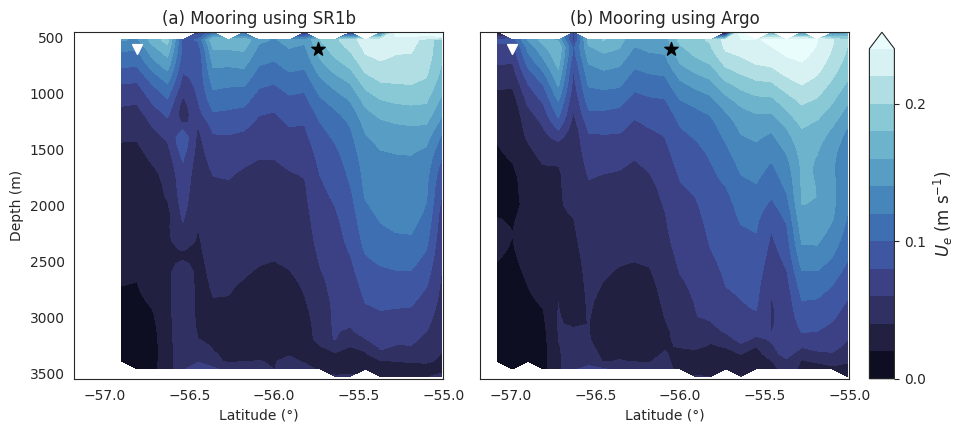

In [19]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True)
levels = np.arange(0,0.26,0.02)
cmap = cmo.cm.ice

# Moorings SR1b
im1 = ax1.contourf(lat_moorings, depth_moorings, ds_moorings_sr1b_depth.ue, cmap=cmap, levels = levels,extend='max')
ax1.scatter(PF_lat_SR1b, 600, marker='v', color='w', s=50, zorder=10)
ax1.scatter(SAF_lat_SR1b, 600, marker='*', color='k', s=100, zorder=10)
# Moorings Argo
im2 = ax2.contourf(lat_moorings, depth_moorings, ds_moorings_argo_depth.ue, cmap=cmap, levels = levels,extend='max')
ax2.scatter(PF_lat_Argo, 600, marker='v', color='w', s=50, zorder=10)
ax2.scatter(SAF_lat_Argo, 600, marker='*', color='k', s=100, zorder=10)

for ax in [ax1,ax2]:
    ax.set_xlim(-57.18,-55)
    ax.set_ylim(450,3550)
    ax.invert_yaxis()
    ax.set_xlabel('Latitude (°)')
ax1.set_ylabel('Depth (m)')

ax1.set_title(r'(a) Mooring using SR1b')
ax2.set_title(r'(b) Mooring using Argo')

cbar_ax1 = fig.add_axes([0.92, 0.11, 0.025, 0.77])
cbar1 = fig.colorbar(im1, cax=cbar_ax1, orientation='vertical', ticks=[0,0.1,0.2])
#cbar1.ax.set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$'])
cbar1.ax.set_ylabel(r'$U_{e}$ (m s$^{-1}$)',fontsize=12)

plt.subplots_adjust(wspace=0.1)

plt.savefig('figures_paper/Ue.pdf', bbox_inches='tight')
plt.show()

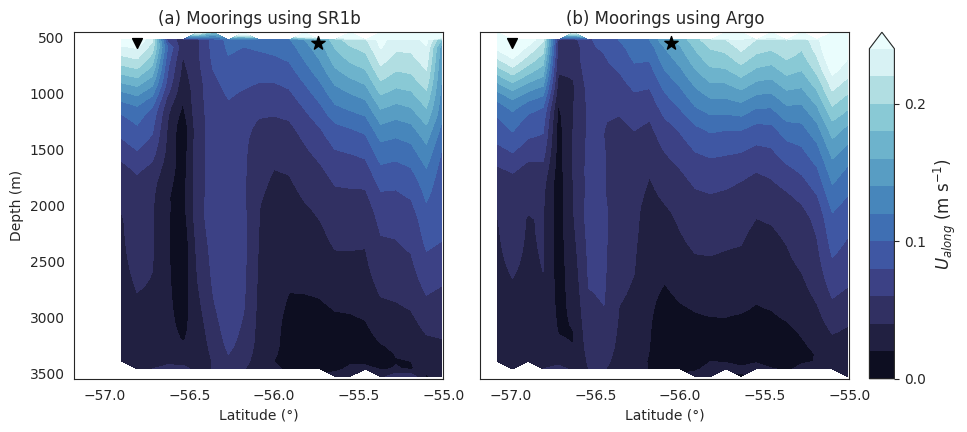

In [20]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True)
levels = np.arange(0,0.26,0.02)
cmap = cmo.cm.ice

# Moorings SR1b
im1 = ax1.contourf(lat_moorings, depth_moorings, ds_moorings_sr1b_depth.upar, cmap=cmap, levels = levels,extend='max')
ax1.scatter(PF_lat_SR1b, 550, marker='v', color='k', s=50, zorder=10)
ax1.scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
# Moorings Argo
im2 = ax2.contourf(lat_moorings, depth_moorings, ds_moorings_argo_depth.upar, cmap=cmap, levels = levels,extend='max')
ax2.scatter(PF_lat_Argo, 550, marker='v', color='k', s=50, zorder=10)
ax2.scatter(SAF_lat_Argo, 550, marker='*', color='k', s=100, zorder=10)

for ax in [ax1,ax2]:
    ax.set_xlim(-57.18,-55)
    ax.set_ylim(450,3550)
    ax.invert_yaxis()
    ax.set_xlabel('Latitude (°)')
ax1.set_ylabel('Depth (m)')

ax1.set_title(r'(a) Moorings using SR1b')
ax2.set_title(r'(b) Moorings using Argo')

cbar_ax1 = fig.add_axes([0.92, 0.11, 0.025, 0.77])
cbar1 = fig.colorbar(im1, cax=cbar_ax1, orientation='vertical', ticks=[0,0.1,0.2])
#cbar1.ax.set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$'])
cbar1.ax.set_ylabel(r'$U_{along}$ (m s$^{-1}$)',fontsize=12)

plt.subplots_adjust(wspace=0.1)

#plt.savefig('figures_paper/Ualong.pdf', bbox_inches='tight')
plt.show()

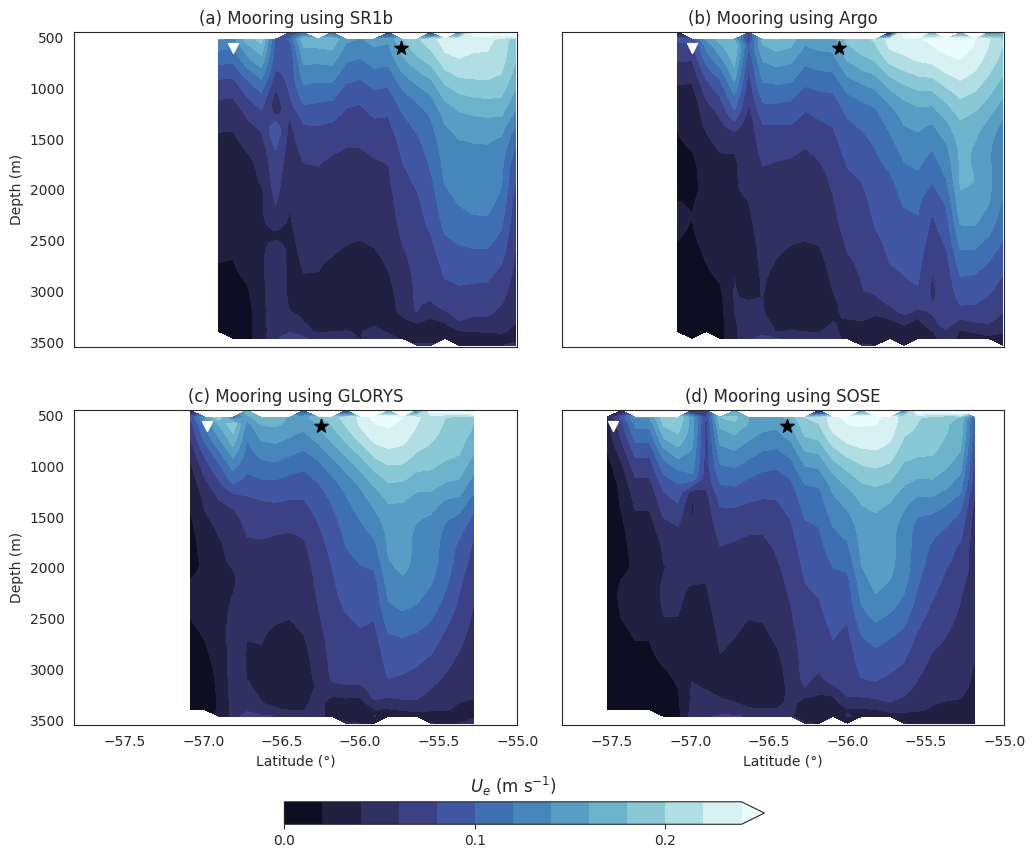

In [21]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,9), sharey=True, sharex=True)
levels = np.arange(0,0.26,0.02)
cmap = cmo.cm.ice

# Moorings SR1b
im1 = ax1.contourf(lat_moorings, depth_moorings, ds_moorings_sr1b_depth.ue, cmap=cmap, levels = levels,extend='max')
ax1.scatter(PF_lat_SR1b, 600, marker='v', color='w', s=50, zorder=10)
ax1.scatter(SAF_lat_SR1b, 600, marker='*', color='k', s=100, zorder=10)
# Moorings Argo
im2 = ax2.contourf(lat_moorings, depth_moorings, ds_moorings_argo_depth.ue, cmap=cmap, levels = levels,extend='max')
ax2.scatter(PF_lat_Argo, 600, marker='v', color='w', s=50, zorder=10)
ax2.scatter(SAF_lat_Argo, 600, marker='*', color='k', s=100, zorder=10)
# Moorings GLORYS
im3 = ax3.contourf(lat_moorings, depth_moorings, ds_moorings_cmems_depth.ue, cmap=cmap, levels = levels,extend='max')
ax3.scatter(PF_lat_CMEMS, 600, marker='v', color='w', s=50, zorder=10)
ax3.scatter(SAF_lat_CMEMS, 600, marker='*', color='k', s=100, zorder=10)
# Moorings SOSE
im4 = ax4.contourf(lat_moorings, depth_moorings, ds_moorings_sose_depth.ue, cmap=cmap, levels = levels,extend='max')
ax4.scatter(PF_lat_SOSE, 600, marker='v', color='w', s=50, zorder=10)
ax4.scatter(SAF_lat_SOSE, 600, marker='*', color='k', s=100, zorder=10)

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xlim(-57.82, -55)
    ax.set_ylim(450,3550)
    ax.invert_yaxis()
ax3.set_xlabel('Latitude (°)')
ax4.set_xlabel('Latitude (°)')
ax1.set_ylabel('Depth (m)')
ax3.set_ylabel('Depth (m)')

ax1.set_title(r'(a) Mooring using SR1b')
ax2.set_title(r'(b) Mooring using Argo')
ax3.set_title(r'(c) Mooring using GLORYS')
ax4.set_title(r'(d) Mooring using SOSE')

cbar_ax = fig.add_axes([0.3, 0, 0.4, 0.025])
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal', ticks=[0,0.1,0.2])
cbar.ax.set_title(r'$U_{e}$ (m s$^{-1}$)',fontsize=12)

plt.subplots_adjust(wspace=0.1)
plt.savefig('figures_paper/Ue_all.pdf', bbox_inches='tight')
plt.show()

## Eddy diffusivity

/tmp/ipykernel_57603/1736466734.py:15: RuntimeWarning: invalid value encountered in log10
  im3 = ax3.contourf(lat_moorings, depth_moorings, np.log10(ds_chapmansallee.K.values),cmap=cmap, levels = levs_moorings, extend='both')


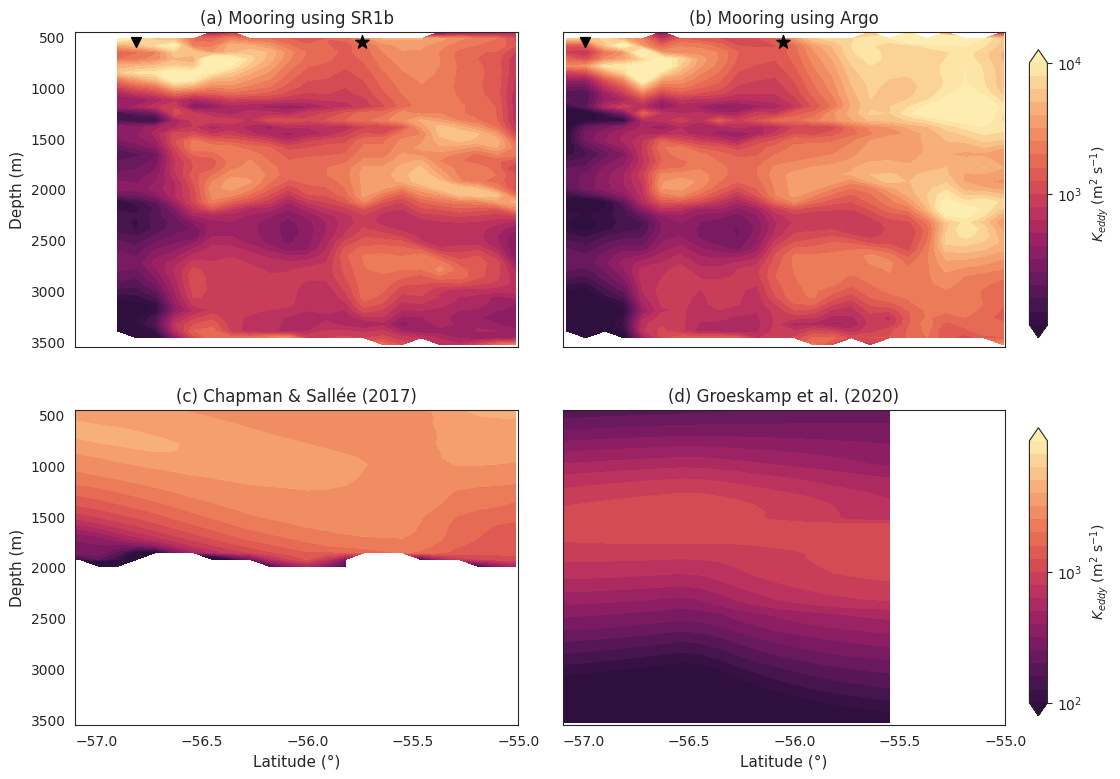

In [ ]:
ds_groeskamp = xr.open_dataset('data/Groeskamp_diffusivity/eddy_diff_Groeskamp.nc')
ds_chapmansallee = xr.open_dataset('data/ChapmanSallée_diffusivity/eddy_diff_ChapmanSallée.nc')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,9),sharex=True, sharey=True)
cmap = cmo.cm.matter_r
levs_moorings = np.arange(2, 4.1, 0.1)
#levs_groeskamp = np.arange(1.5, 3.51, 0.1)

im1 = ax1.contourf(lat_moorings, depth_moorings, np.log10(ds_moorings_sr1b_depth.eddy_diff.values),cmap=cmap, levels = levs_moorings, extend='both')
ax1.scatter(PF_lat_SR1b, 550, marker='v', color='k', s=50, zorder=10)
ax1.scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
im2 = ax2.contourf(lat_moorings, depth_moorings, np.log10(ds_moorings_argo_depth.eddy_diff.values),cmap=cmap, levels = levs_moorings, extend='both')
ax2.scatter(PF_lat_Argo, 550, marker='v', color='k', s=50, zorder=10)
ax2.scatter(SAF_lat_Argo, 550, marker='*', color='k', s=100, zorder=10)
im3 = ax3.contourf(lat_moorings, depth_moorings, np.log10(ds_chapmansallee.K.values),cmap=cmap, levels = levs_moorings, extend='both')
im4 = ax4.contourf(lat_moorings, depth_moorings, np.log10(ds_groeskamp.K.values),cmap=cmap, levels = levs_moorings, extend='both')

cbar_ax1 = fig.add_axes([0.92, 0.54, 0.015, 0.32])
cbar1 = fig.colorbar(im1, cax=cbar_ax1, orientation='vertical', ticks=[3,4])
cbar1.ax.set_yticklabels([r'$10^{3}$',r'$10^{4}$'])
cbar1.ax.set_ylabel(r'$K_{eddy}$ (m$^2$ s$^{-1}$)')

cbar_ax2 = fig.add_axes([0.92, 0.12, 0.015, 0.32])
cbar2 = fig.colorbar(im3, cax=cbar_ax2, orientation='vertical', ticks=[2,3])
cbar2.ax.set_yticklabels([r'$10^{2}$',r'$10^{3}$'])
cbar2.ax.set_ylabel(r'$K_{eddy}$ (m$^2$ s$^{-1}$)')

ax1.set_title(r'(a) Mooring using SR1b')
ax2.set_title(r'(b) Mooring using Argo')
ax3.set_title(r'(c) Chapman & Sallée (2017)')
ax4.set_title(r'(d) Groeskamp et al. (2020)')

for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(False)
    ax.set_xlim(-57.1,-55)
    ax.set_ylim(450,3550)
    ax.invert_yaxis()
for ax in [ax3,ax4]:
    ax.set_xticks(np.arange(-57,-54.8,0.5))
    ax.set_xlabel(r'Latitude (°)', fontsize=11)
for ax in [ax1,ax3]:
    ax.set_ylabel('Depth (m)', fontsize=11)

plt.subplots_adjust(wspace=0.1)
plt.savefig('figures_paper/diffusivity.pdf', bbox_inches='tight')

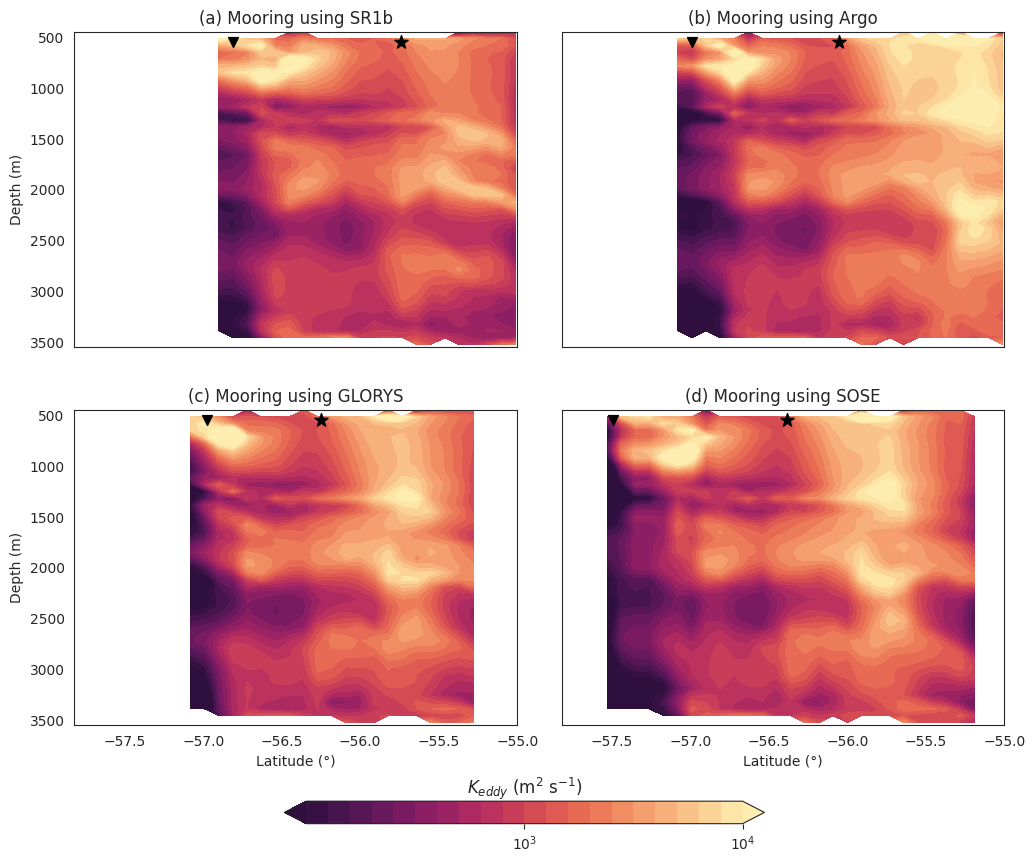

In [23]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,9),sharex=True, sharey=True)
cmap = cmo.cm.matter_r
#levs_moorings = np.arange(2.5, 4.51, 0.1)
levs_moorings = np.arange(2, 4.1, 0.1)

im1 = ax1.contourf(lat_moorings, depth_moorings, np.log10(ds_moorings_sr1b_depth.eddy_diff.values),cmap=cmap, levels = levs_moorings, extend='both')
ax1.scatter(PF_lat_SR1b, 550, marker='v', color='k', s=50, zorder=10)
ax1.scatter(SAF_lat_SR1b, 550, marker='*', color='k', s=100, zorder=10)
im2 = ax2.contourf(lat_moorings, depth_moorings, np.log10(ds_moorings_argo_depth.eddy_diff.values),cmap=cmap, levels = levs_moorings, extend='both')
ax2.scatter(PF_lat_Argo, 550, marker='v', color='k', s=50, zorder=10)
ax2.scatter(SAF_lat_Argo, 550, marker='*', color='k', s=100, zorder=10)
im3 = ax3.contourf(lat_moorings, depth_moorings, np.log10(ds_moorings_cmems_depth.eddy_diff.values),cmap=cmap, levels = levs_moorings, extend='both')
ax3.scatter(PF_lat_CMEMS, 550, marker='v', color='k', s=50, zorder=10)
ax3.scatter(SAF_lat_CMEMS, 550, marker='*', color='k', s=100, zorder=10)
im4 = ax4.contourf(lat_moorings, depth_moorings, np.log10(ds_moorings_sose_depth.eddy_diff.values),cmap=cmap, levels = levs_moorings, extend='both')
ax4.scatter(PF_lat_SOSE, 550, marker='v', color='k', s=50, zorder=10)
ax4.scatter(SAF_lat_SOSE, 550, marker='*', color='k', s=100, zorder=10)

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xlim(-57.82, -55)
    ax.set_ylim(450,3550)
    ax.invert_yaxis()
for ax in [ax3,ax4]:
    ax.set_xlabel('Latitude (°)')
for ax in [ax1,ax3]:
    ax.set_ylabel('Depth (m)')

ax1.set_title(r'(a) Mooring using SR1b')
ax2.set_title(r'(b) Mooring using Argo')
ax3.set_title(r'(c) Mooring using GLORYS')
ax4.set_title(r'(d) Mooring using SOSE')

cbar_ax = fig.add_axes([0.3, 0, 0.4, 0.025])
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal', ticks=[3,4])
cbar.ax.set_xticklabels([r'$10^{3}$',r'$10^{4}$'])
cbar.ax.set_title(r'$K_{eddy}$ (m$^2$ s$^{-1}$)')

plt.subplots_adjust(wspace=0.1)
plt.savefig('figures_paper/diffusivity_all.pdf', bbox_inches='tight')